In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [4]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [5]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [12]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

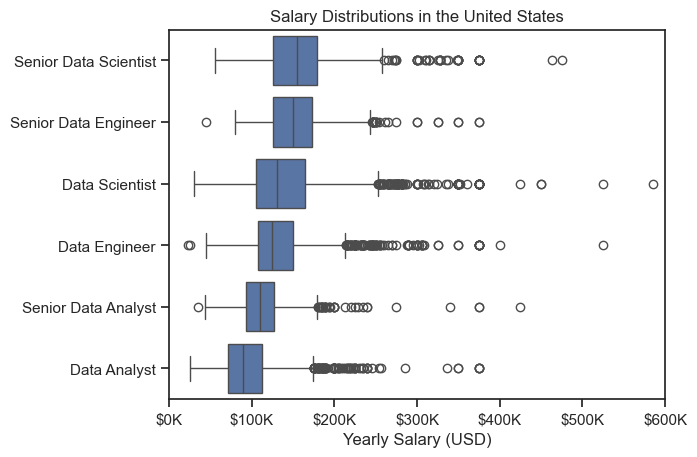

In [13]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600_000)

ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [51]:
df_MLE_US = df[(df['job_title_short'] == 'Machine Learning Engineer') & (df['job_country'] == 'United States')].copy()

df_MLE_US = df_MLE_US.dropna(subset=['salary_year_avg'])

In [52]:
df_MLE_US = df_MLE_US.explode('job_skills')
df_MLE_US 

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
11259,Machine Learning Engineer,Lead Data Scientist - Machine Learning Engineer,"New York, NY",via Ladders,Full-time,False,"New York, United States",2023-04-19 13:03:25,False,True,United States,year,150000.0,NaN,CVS Health,python,"{'programming': ['python', 'sql']}"
11259,Machine Learning Engineer,Lead Data Scientist - Machine Learning Engineer,"New York, NY",via Ladders,Full-time,False,"New York, United States",2023-04-19 13:03:25,False,True,United States,year,150000.0,NaN,CVS Health,sql,"{'programming': ['python', 'sql']}"
12344,Machine Learning Engineer,AI/ML Engineer (L3/L4),"San Francisco, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-07-31 13:03:28,False,False,United States,year,128682.0,NaN,Gather,python,"{'programming': ['python', 'java', 'c++']}"
12344,Machine Learning Engineer,AI/ML Engineer (L3/L4),"San Francisco, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-07-31 13:03:28,False,False,United States,year,128682.0,NaN,Gather,java,"{'programming': ['python', 'java', 'c++']}"
12344,Machine Learning Engineer,AI/ML Engineer (L3/L4),"San Francisco, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-07-31 13:03:28,False,False,United States,year,128682.0,NaN,Gather,c++,"{'programming': ['python', 'java', 'c++']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783990,Machine Learning Engineer,"Machine Learning Scientist, Ads","Mountain View, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-06 06:03:26,False,False,United States,year,172500.0,NaN,Wayfair Inc.,bigquery,"{'cloud': ['bigquery'], 'libraries': ['hadoop'..."
783990,Machine Learning Engineer,"Machine Learning Scientist, Ads","Mountain View, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-06 06:03:26,False,False,United States,year,172500.0,NaN,Wayfair Inc.,hadoop,"{'cloud': ['bigquery'], 'libraries': ['hadoop'..."
783990,Machine Learning Engineer,"Machine Learning Scientist, Ads","Mountain View, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-06 06:03:26,False,False,United States,year,172500.0,NaN,Wayfair Inc.,spark,"{'cloud': ['bigquery'], 'libraries': ['hadoop'..."
783990,Machine Learning Engineer,"Machine Learning Scientist, Ads","Mountain View, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-06 06:03:26,False,False,United States,year,172500.0,NaN,Wayfair Inc.,airflow,"{'cloud': ['bigquery'], 'libraries': ['hadoop'..."


In [53]:
df_highest_paid = df_MLE_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_highest_paid = df_highest_paid.head(10)

df_highest_paid 

,count,median
job_skills,,
haskell,1,213000.0
julia,1,213000.0
scala,7,213000.0
c,5,210000.0
postgresql,1,207500.0
kotlin,1,203000.0
css,1,195000.0
html,1,195000.0
excel,5,181500.0


In [54]:
df_demand = df_MLE_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_demand = df_demand.head(10).sort_values(by='median', ascending=False)

df_demand 

,count,median
job_skills,,
c++,17,179000.0
spark,21,172500.0
go,17,166000.0
java,33,166000.0
pytorch,46,166000.0
aws,34,154812.5
tensorflow,48,150000.0
python,83,150000.0
sql,27,137388.5


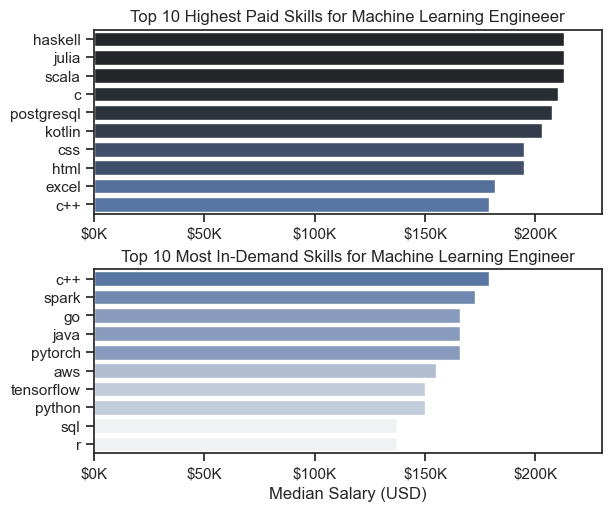

In [58]:
fig, ax = plt.subplots(2,1, constrained_layout=True, figsize=(6,5))

sns.barplot(data=df_highest_paid, x='median', y='job_skills', hue='median', ax=ax[0], palette='dark:b_r')
ax[0].set_title('Top 10 Highest Paid Skills for Machine Learning Engineeer')
ax[0].set_xlabel('')


sns.barplot(data=df_demand, x='median', y='job_skills', hue='median', ax=ax[1], palette='light:b')
ax[1].set_title('Top 10 Most In-Demand Skills for Machine Learning Engineer')
ax[1].set_xlabel('Median Salary (USD)') 

for i in range (2):
    ax[i].set_xlim(0, 230_000)
    ax[i].set_ylabel('')
    ax[i].legend().remove()
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
    
